In [7]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn

In [3]:
%matplotlib inline

In [14]:
dataset = randn(100)

In [15]:
sns.rugplot(dataset)
plt.ylim(0,1)

(0.0, 1.0)

<AxesSubplot:>

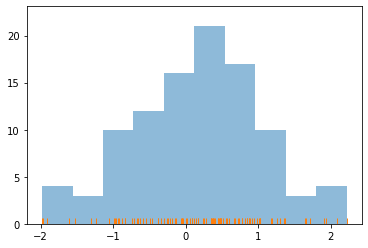

In [16]:
plt.hist(dataset,alpha=0.5)
sns.rugplot(dataset)

(0.1, 0.446)

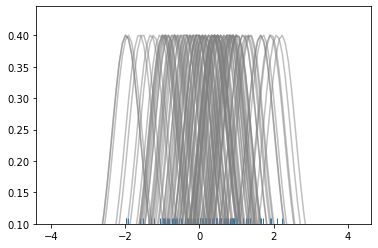

In [25]:
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2
kernel_list = []
for data_point in dataset:
    kernel  = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)


plt.ylim(0.1)

Text(0.5, 1.0, 'Sum of the bases funtions')

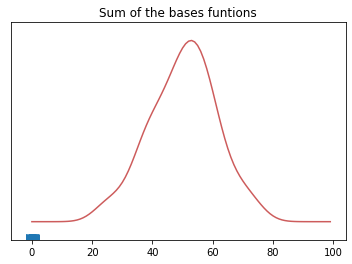

In [26]:
sum_of_kernel=np.sum(kernel_list,axis=0)
fig = plt.plot(sum_of_kernel,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.title("Sum of the bases funtions")

<AxesSubplot:ylabel='Density'>

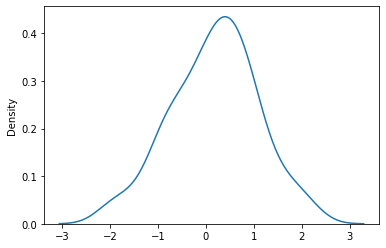

In [27]:
sns.kdeplot(dataset)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.75 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Library/

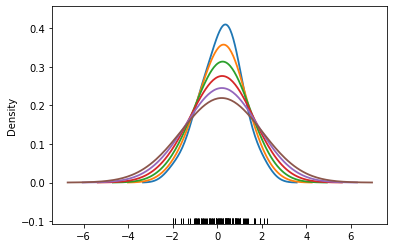

In [28]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distri

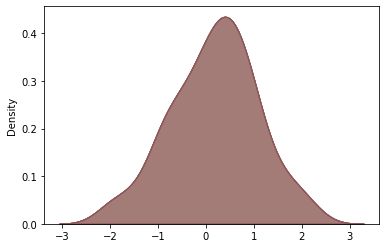

In [30]:
kernel_options = ['bw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

In [31]:
sns.kdeplot(dataset,vertical=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

In [33]:
sns.kdeplot(dataset,cumulative=True)
#cumulative distribution plot

<AxesSubplot:ylabel='Density'>

In [37]:
mean = [0,0]
cov=[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe=pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

ValueError: If using all scalar values, you must pass an index

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

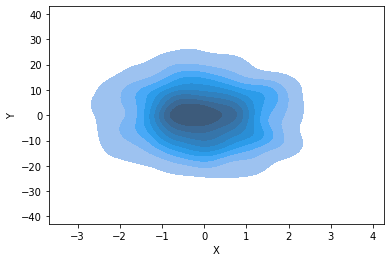

In [39]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X', ylabel='Y'>

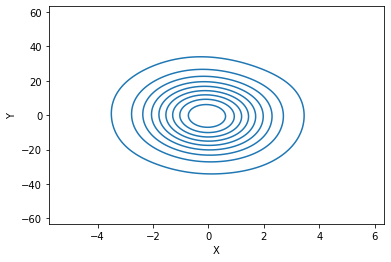

In [43]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

In [44]:
sns.kdeplot(dframe,bw='silverman')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using silverman for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: If using all scalar values, you must pass an index

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


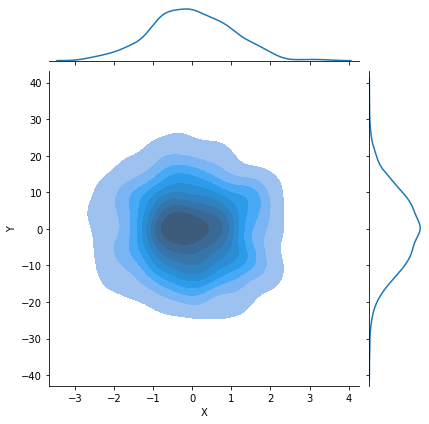

In [47]:
sns.jointplot('X','Y',dframe,kind='kde',shade=True)